# Import data

In [1]:
setwd("G:\\My Drive\\2. UTAS\\2017 Sem 2\\KMA253 - Data Handling & Statistics 2\\Assessments\\Project 2")

d <- read.csv("rind_15sites.csv",header=T)
d$SiteNum<-as.factor(d$SiteNum)
d<-data.frame(d)
head(d)

Thickness SiteNum Episode
1 1.9       1       Arm    
2 2.0       1       Arm    
3 3.1       1       Arm    
4 2.9       1       Arm    
5 2.8       1       Arm    
6 3.0       1       Arm

# Ordering of groups

In [51]:
#write.table(data.frame("Mean Thickness"=sort(tapply(d$Thickness, d$SiteNum, mean),decreasing=TRUE)),"clipboard",sep="\t")
data.frame("Mean Thickness"=sort(tapply(d$Thickness, d$SiteNum, mean),decreasing=TRUE))

Mean.Thickness
6  10.482        
16  6.332        
15  3.156        
1   2.386        
9   1.494        
7   1.112        
2   0.882        
3   0.748        
5   0.726        
11  0.570        
8   0.402        
4   0.336        
14  0.248        
13  0.222        
12  0.202

In [52]:
#write.table(data.frame("Median Thickness"=sort(tapply(d$Thickness, d$SiteNum, median),decreasing=TRUE)),"clipboard",sep="\t")
data.frame("Median Thickness"=sort(tapply(d$Thickness, d$SiteNum, median),decreasing=TRUE))

Median.Thickness
6  10.5            
16  5.8            
15  2.8            
1   2.4            
9   1.5            
7   1.0            
2   0.8            
3   0.8            
5   0.8            
11  0.4            
8   0.3            
4   0.2            
12  0.2            
13  0.2            
14  0.2

## Plot of group means - with 95% t-int

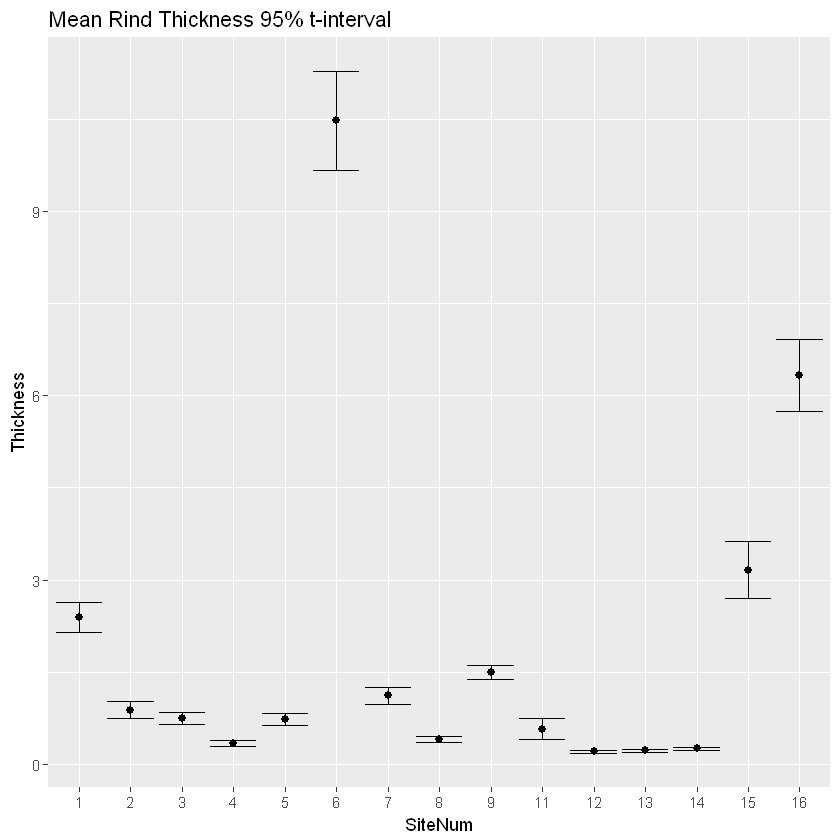

In [54]:
# Adapted from https://stat.ethz.ch/pipermail/r-help/2010-July/245536.html

mcalc <- mean(d$Thickness)

n <- 50
k <- 15
t.crit <- qt(p = .05/2, df = n-k-1, lower.tail=FALSE)

df <- data.frame(SiteNum =as.factor(c(1,2,3,4,5,6,7,8,9,11,12,13,14,15,16)),
                 Thickness =as.vector(tapply(d$Thickness, d$SiteNum, mean)),
                 L =as.vector(tapply(d$Thickness, d$SiteNum, mean) - ((t.crit * tapply(d$Thickness, d$SiteNum,sd))/sqrt(n))),
                 U =as.vector(tapply(d$Thickness, d$SiteNum, mean) + ((t.crit * tapply(d$Thickness, d$SiteNum,sd))/sqrt(n))))

require(ggplot2)
ggplot(df, aes(x = SiteNum, y = Thickness)) +
    geom_point(size = 2) +
    geom_errorbar(aes(ymax = U, ymin = L)) +
    ggtitle("Mean Rind Thickness 95% t-interval")

## ANOVA - $Thickness=SiteNum $ 

In [132]:
fit.aov<-aov(Thickness~SiteNum, data=d)
summary(fit.aov)
summary.lm(fit.aov)

             Df Sum Sq Mean Sq F value Pr(>F)    
SiteNum      14   5724   408.9   369.8 <2e-16 ***
Residuals   735    813     1.1                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
aov(formula = Thickness ~ SiteNum, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3820 -0.2480 -0.0240  0.1715  6.8680 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3860     0.1487  16.046  < 2e-16 ***
SiteNum2     -1.5040     0.2103  -7.152 2.07e-12 ***
SiteNum3     -1.6380     0.2103  -7.789 2.30e-14 ***
SiteNum4     -2.0500     0.2103  -9.748  < 2e-16 ***
SiteNum5     -1.6600     0.2103  -7.894 1.07e-14 ***
SiteNum6      8.0960     0.2103  38.499  < 2e-16 ***
SiteNum7     -1.2740     0.2103  -6.058 2.20e-09 ***
SiteNum8     -1.9840     0.2103  -9.435  < 2e-16 ***
SiteNum9     -0.8920     0.2103  -4.242 2.50e-05 ***
SiteNum11    -1.8160     0.2103  -8.636  < 2e-16 ***
SiteNum12    -2.1840     0.2103 -10.386  < 2e-16 ***
SiteNum13    -2.1640     0.2103 -10.290  < 2e-16 ***
SiteNum14    -2.1380     0.2103 -10.167  < 2e-16 ***
SiteNum15     0.7700     0.2103   3.662 0.000269 ***
SiteNum16     3.9460     0.2103  18.764  < 2

Suggests that there are groups with significant differences in mean rind thickness

### Regression residual diagnostic plots

In [57]:
fit.aov<-aov(Thickness~SiteNum, data=d)
opar <- par(mfrow=c(2,2))
plot(fit.aov)
par(opar)

Issues with normality and homoskedastic variance  
A few points with high standardised residuals - namely 268, 276 and 726
+ Note - 276 and 268 are in the same group

## Ranked sum tests - Kruskal test

In [9]:
kruskal.test(Thickness~SiteNum, data=d)


	Kruskal-Wallis rank sum test

data:  Thickness by SiteNum
Kruskal-Wallis chi-squared = 637.4, df = 14, p-value < 2.2e-16


very significant p-value - same as ANOVA - this agrees with result of ANOVA

## TukeyHSD post-hoc $Thickness=SiteNum $ 
** Assumptions **
+ The observations being tested are independent within and among the groups.
+ The groups associated with each mean in the test are normally distributed.
+ There is equal within-group variance across the groups associated with each mean in the test (homogeneity of variance).

Data is not normally distributed and not homoskedastic - therefore TukeyHSD is not valid

In [2]:
# Adapted from https://stackoverflow.com/questions/24598710/presenting-tukey-hsd-pairwise-p-values-in-a-table

hsd <- TukeyHSD(aov(Thickness~SiteNum, data=d), which = "SiteNum")

row.pvalues<-data.frame(hsd$SiteNum)$p.adj

num.groups<-length(unique(d$SiteNum))

p.table <- matrix("", num.groups, num.groups)
p.table[lower.tri(p.table)] <-round(row.pvalues, 3)

colnames(p.table)<-unique(d$SiteNum)
rownames(p.table)<-unique(d$SiteNum)

p.table

1     2     3     4     5     6 7     8 9     11    12 13 14 15 16
1                                                                    
2  0                                                                 
3  0     1                                                           
4  0     0.374 0.822                                                 
5  0     1     1     0.875                                           
6  0     0     0     0     0                                         
7  0     0.999 0.923 0.019 0.883 0                                   
8  0     0.604 0.948 1     0.97  0 0.054                             
9  0.002 0.194 0.031 0     0.022 0 0.891 0                           
11 0     0.978 1     0.999 1     0 0.387 1 0.001                     
12 0     0.083 0.374 1     0.448 0 0.002 1 0     0.917               
13 0     0.108 0.441 1     0.518 0 0.002 1 0     0.946 1             
14 0     0.15  0.532 1     0.611 0 0.004 1 0     0.971 1  1          
15 0.021 0     0     0     0     0 0     0 0     0     0  0  0       
16 0     0     0     0     0     0 0     0 0     0     0  0  0  0

## Testing equal varaince - $Thickness=SiteNum $ 

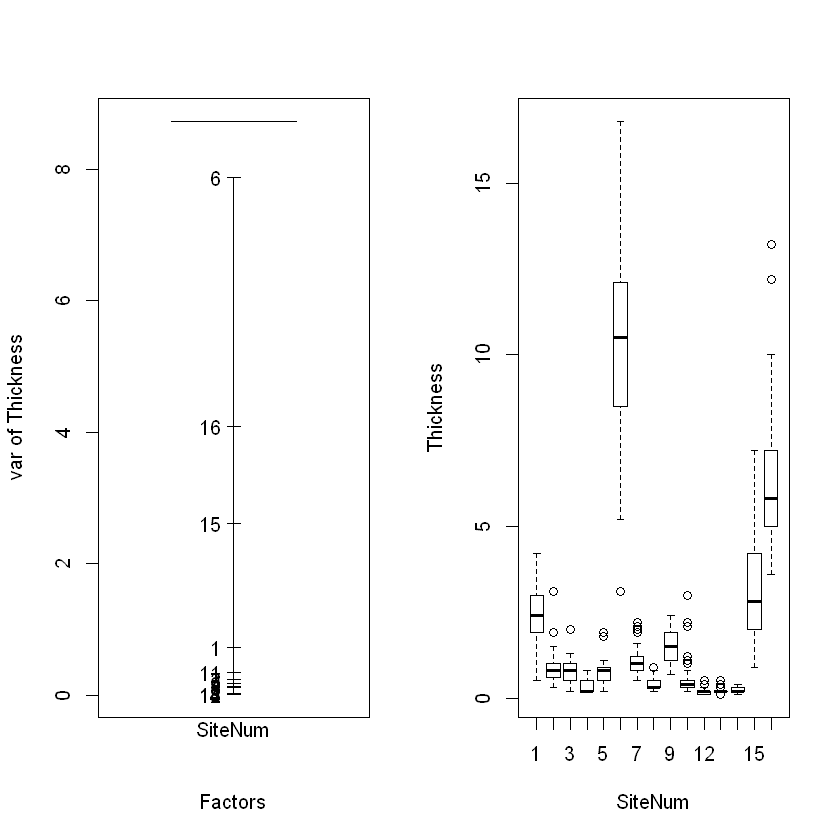

In [134]:
opar <- par(mfrow=c(1,2))
plot.design(Thickness~SiteNum,data=d,fun=var)
plot(Thickness~SiteNum, data=d)
par(opar)

### Max variance vs Min variance in groups

In [4]:
var <- sort(tapply(d$Thickness, d$SiteNum, var),decreasing=TRUE)
max(var)/min(var)

[1] 1457.076

### Bartlett test - $Thickness=SiteNum $ 

In [7]:
bartlett.test(Thickness~SiteNum, data=d)


	Bartlett test of homogeneity of variances

data:  Thickness by SiteNum
Bartlett's K-squared = 1439.5, df = 14, p-value < 2.2e-16


### Levene test - $Thickness=SiteNum $ 

In [8]:
#install.packages("car",repos = "https://mirror.aarnet.edu.au/pub/CRAN/", dependencies = TRUE)
library(car)
leveneTest(d$Thickness,d$SiteNum)

Warning message:
"package 'car' was built under R version 3.3.3"

Df  F value  Pr(>F)      
group  14 45.00969 5.447795e-89
      735       NA           NA

## Box cox plot

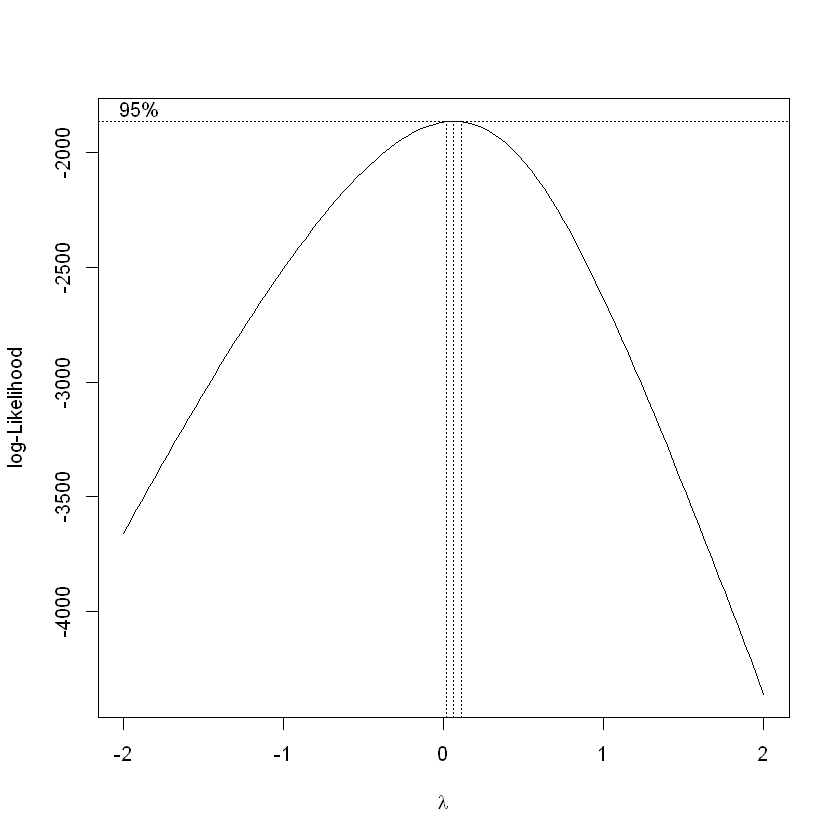

In [6]:
library(MASS)
boxcox(Thickness~SiteNum, data=d)
# suggests log

## ANOVA $log(Thickness)=SiteNum $ 

             Df Sum Sq Mean Sq F value Pr(>F)    
SiteNum      13 1021.0   78.54   433.6 <2e-16 ***
Residuals   686  124.2    0.18                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
aov(formula = log(Thickness) ~ SiteNum, data = d[d$SiteNum != 
    "11", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48353 -0.23683  0.02115  0.29626  1.37569 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.79038    0.06019  13.132  < 2e-16 ***
SiteNum2    -1.03467    0.08511 -12.156  < 2e-16 ***
SiteNum3    -1.19082    0.08511 -13.991  < 2e-16 ***
SiteNum4    -1.98476    0.08511 -23.319  < 2e-16 ***
SiteNum5    -1.24670    0.08511 -14.647  < 2e-16 ***
SiteNum6     1.51834    0.08511  17.839  < 2e-16 ***
SiteNum7    -0.77445    0.08511  -9.099  < 2e-16 ***
SiteNum8    -1.78331    0.08511 -20.952  < 2e-16 ***
SiteNum9    -0.43004    0.08511  -5.052  5.6e-07 ***
SiteNum12   -2.48873    0.08511 -29.240  < 2e-16 ***
SiteNum13   -2.35950    0.08511 -27.721  < 2e-16 ***
SiteNum14   -2.22848    0.08511 -26.182  < 2e-16 ***
SiteNum15    0.22918    0.08511   2.693  0.00726 ** 
SiteNum16    1.01120    0.08511  11.880  < 2e-16 ***
---

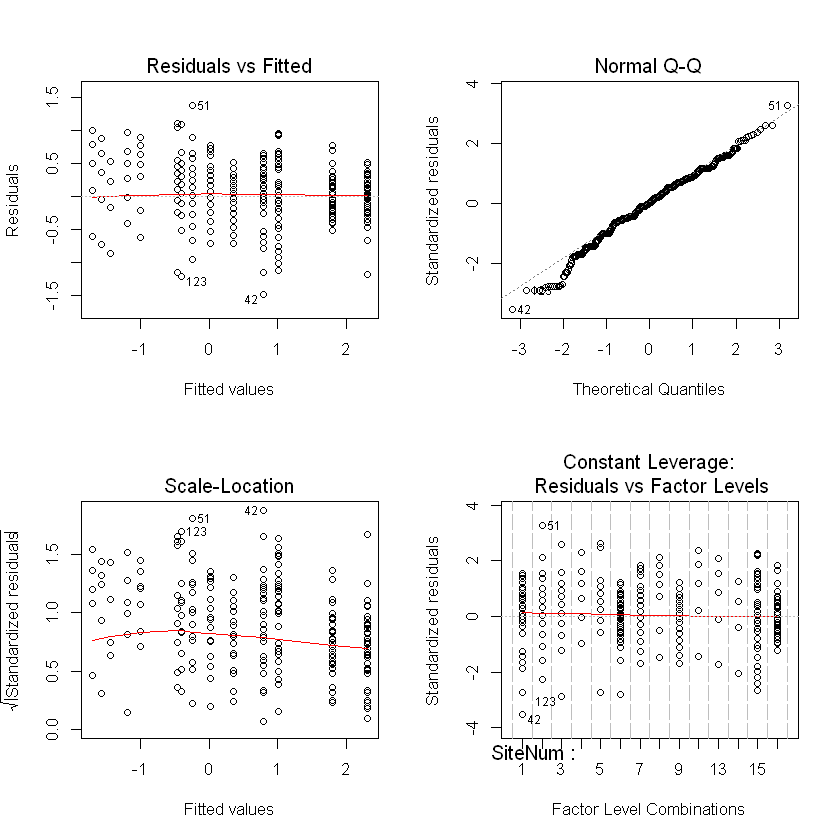

In [17]:
fit.aov<-aov(log(Thickness)~SiteNum, data=d[d$SiteNum!="11",])
summary(fit.aov)
summary.lm(fit.aov)
opar <- par(mfrow=c(2,2))
plot(fit.aov)
par(opar)

Normality now looks reasonable - but still heteroskedastic

## Ranked sum tests - Kruskal test

In [11]:
kruskal.test(log(Thickness)~SiteNum, data=d)


	Kruskal-Wallis rank sum test

data:  log(Thickness) by SiteNum
Kruskal-Wallis chi-squared = 637.4, df = 14, p-value < 2.2e-16


very significant p-value - same as ANOVA

## Testing equal varaince - $log(Thickness)=SiteNum $ 

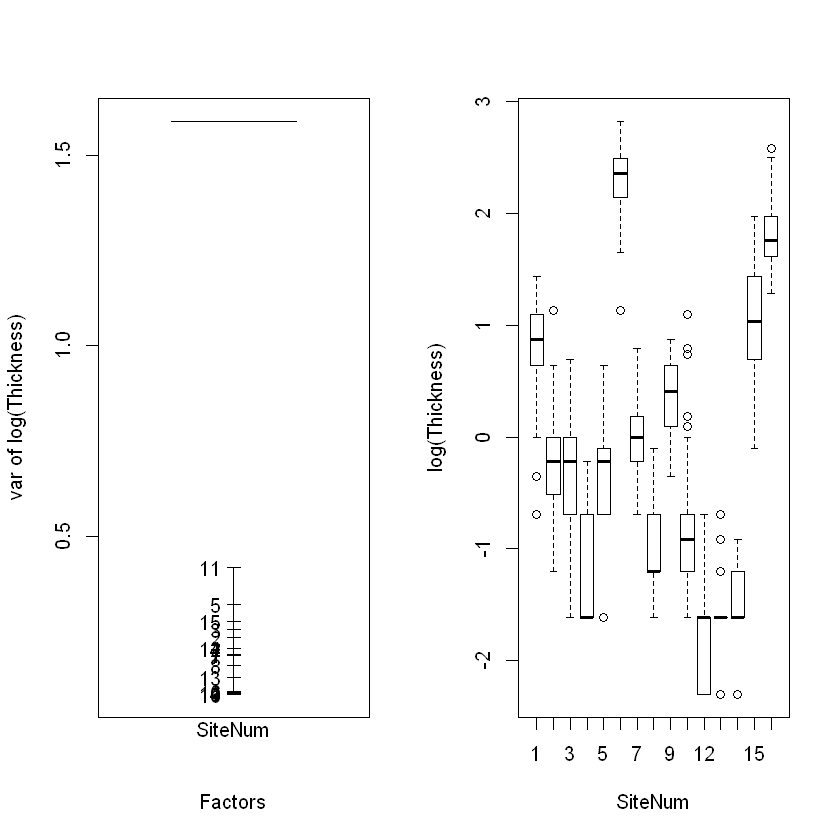

In [138]:
opar <- par(mfrow=c(1,2))
plot.design(log(Thickness)~SiteNum,data=d,fun=var)
plot(log(Thickness)~SiteNum, data=d)
par(opar)

### Max variance vs Min variance in groups

In [5]:
var <- sort(tapply(log(d$Thickness), d$SiteNum, var),decreasing=TRUE)
max(var)/min(var)

[1] 4.879884

Still a problem - rule of thumb - no greater than 4 times  
https://stats.stackexchange.com/questions/91872/alternatives-to-one-way-anova-for-heteroskedastic-data

### Bartlett test - $log(Thickness)=SiteNum $ 

In [21]:
bartlett.test(log(Thickness)~SiteNum, data=d)


	Bartlett test of homogeneity of variances

data:  log(Thickness) by SiteNum
Bartlett's K-squared = 82.55, df = 14, p-value = 9.497e-12


### Levene test - $log(Thickness)=SiteNum $ 

In [23]:
#install.packages("car",repos = "https://mirror.aarnet.edu.au/pub/CRAN/", dependencies = TRUE)
library(car)
leveneTest(log(d$Thickness),d$SiteNum)

Df  F value  Pr(>F)      
group  14 3.028675 0.0001452579
      735       NA           NA

## Welch's ANOVA $log(Thickness)=SiteNum $ 
Requires normality, but can be used with heteroskedasticity and unequal sample sizes

In [4]:
oneway.test(log(Thickness)~SiteNum, data=d,var.equal=FALSE)


	One-way analysis of means (not assuming equal variances)

data:  log(Thickness) and SiteNum
F = 604.73, num df = 14.00, denom df = 279.66, p-value < 2.2e-16


P-value indicates that there is at least one group with significant difference to grand mean
## Pairwise t.test $log(Thickness)=SiteNum $ 

In [141]:
data <- pairwise.t.test(log(d$Thickness),d$SiteNum, pool.sd=FALSE)
write.table(data[3], "clipboard", quote=FALSE, sep="\t")
data


	Pairwise comparisons using t tests with non-pooled SD 

data:  log(d$Thickness) and d$SiteNum 

   1       2       3       4       5       6       7       8       9      
2  < 2e-16 -       -       -       -       -       -       -       -      
3  < 2e-16 0.47575 -       -       -       -       -       -       -      
4  < 2e-16 3.3e-15 2.8e-11 -       -       -       -       -       -      
5  < 2e-16 0.28515 0.60473 4.6e-09 -       -       -       -       -      
6  < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 -       -       -       -      
7  1.1e-12 0.05127 0.00040 < 2e-16 0.00018 < 2e-16 -       -       -      
8  < 2e-16 1.5e-11 1.1e-07 0.15885 8.7e-06 < 2e-16 < 2e-16 -       -      
9  2.8e-06 1.9e-09 1.8e-12 < 2e-16 5.7e-12 < 2e-16 0.00021 < 2e-16 -      
11 < 2e-16 2.5e-05 0.00427 0.02323 0.02495 < 2e-16 5.8e-10 0.47575 < 2e-16
12 < 2e-16 < 2e-16 < 2e-16 5.3e-06 < 2e-16 < 2e-16 < 2e-16 2.9e-11 < 2e-16
13 < 2e-16 < 2e-16 < 2e-16 0.00026 < 2e-16 < 2e-16 < 2e-16 7.8e-10 < 2e-16
14

## Games-Howell test  $log(Thickness)=SiteNum $ 
The Games-Howell post-hoc test is another nonparametric approach to compare combinations of groups or treatments. Although rather similar to Tukey’s test in its formulation, the Games-Howell test does not assume equal variances and sample sizes. The test was designed based on Welch’s degrees of freedom correction and uses Tukey’s studentized range distribution, denoted qq. The Games-Howell test is performed on the ranked variables similar to other nonparametric tests. Since the Games-Howell test does not rely on equal variances and sample sizes, it is often recommended over other approaches such as Tukey’s test.

In [2]:
## So here is the code that the super awesome guy wrote 
## that will get our games howell confidence intervals.

## Just highlight the whole thing and read it all in.

## Then, once you've done that, you can try your analysis...
## something like (assuming you called your data "rind")

## games.howell(rind$SiteNum, rind$Thickness)

## That should get you what you want.

games.howell <- function(grp, obs) {
  
  #Create combinations
  combs <- combn(unique(grp), 2)
  
  # Statistics that will be used throughout the calculations:
  # n = sample size of each group
  # groups = number of groups in data
  # Mean = means of each group sample
  # std = variance of each group sample
  n <- tapply(obs, grp, length)
  groups <- length(tapply(obs, grp, length))
  Mean <- tapply(obs, grp, mean)
  std <- tapply(obs, grp, var)
  
  statistics <- lapply(1:ncol(combs), function(x) {
    
    mean.diff <- Mean[combs[2,x]] - Mean[combs[1,x]]
    
    #t-values
    t <- abs(Mean[combs[1,x]] - Mean[combs[2,x]]) / sqrt((std[combs[1,x]] / n[combs[1,x]]) + (std[combs[2,x]] / n[combs[2,x]]))
    
    # Degrees of Freedom
    df <- (std[combs[1,x]] / n[combs[1,x]] + std[combs[2,x]] / n[combs[2,x]])^2 / # Numerator Degrees of Freedom
      ((std[combs[1,x]] / n[combs[1,x]])^2 / (n[combs[1,x]] - 1) + # Part 1 of Denominator Degrees of Freedom 
         (std[combs[2,x]] / n[combs[2,x]])^2 / (n[combs[2,x]] - 1)) # Part 2 of Denominator Degrees of Freedom
    
    #p-values
    p <- ptukey(t * sqrt(2), groups, df, lower.tail = FALSE)
    
    # Sigma standard error
    se <- sqrt(0.5 * (std[combs[1,x]] / n[combs[1,x]] + std[combs[2,x]] / n[combs[2,x]]))
    
    # Upper Confidence Limit
    upper.conf <- lapply(1:ncol(combs), function(x) {
      mean.diff + qtukey(p = 0.95, nmeans = groups, df = df) * se
    })[[1]]
    
    # Lower Confidence Limit
    lower.conf <- lapply(1:ncol(combs), function(x) {
      mean.diff - qtukey(p = 0.95, nmeans = groups, df = df) * se
    })[[1]]
    
    # Group Combinations
    grp.comb <- paste(combs[1,x], ':', combs[2,x])
    
    # Collect all statistics into list
    stats <- list(grp.comb, mean.diff, se, t, df, p, upper.conf, lower.conf)
  })
  
  # Unlist statistics collected earlier
  stats.unlisted <- lapply(statistics, function(x) {
    unlist(x)
  })
  
  # Create dataframe from flattened list
  results <- data.frame(matrix(unlist(stats.unlisted), nrow = length(stats.unlisted), byrow=TRUE))
  
  # Select columns set as factors that should be numeric and change with as.numeric
  results[c(2, 3:ncol(results))] <- round(as.numeric(as.matrix(results[c(2, 3:ncol(results))])), digits = 3)
  
  # Rename data frame columns
  colnames(results) <- c('groups', 'Mean Difference', 'Standard Error', 't', 'df', 'p', 'upper limit', 'lower limit')
  
  return(results)
}

In [5]:
games.howell.results<-games.howell(d$SiteNum, log(d$Thickness))
write.table(games.howell.results, "gameshowel_log.csv", quote=FALSE, sep=",")

#### Create p-value matrix table from Games Howell results

In [3]:
# Adapted from https://stackoverflow.com/questions/24598710/presenting-tukey-hsd-pairwise-p-values-in-a-table
games.howell.results<-games.howell(d$SiteNum, d$Thickness)
row.pvalues<-games.howell.results$p

num.groups<-length(unique(d$SiteNum))

p.table <- matrix("", num.groups, num.groups)
p.table[lower.tri(p.table)] <-round(row.pvalues, 3)

colnames(p.table)<-unique(d$SiteNum)
rownames(p.table)<-unique(d$SiteNum)

write.table(p.table,"clipboard",sep="\t")